# PaddlePaddle for Object Detection and Keypoint Detection

PaddleDetection supports multiple models for Object Detection and Keypoint Detection. In this notebook we will be using DINO with ResNet50 backbone and HigherHRNet for keypoint detection.

Since we would be using paddlepaddle on cuda we need to install paddlepaddle-gpu. We will be using it on colab, its command is

In [ ]:
!pip install paddlepaddle-gpu==2.4.2.post117 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.3/557.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 29.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have prot

In [ ]:
!pip install --upgrade setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 48.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.


For using PaddleDetection we need to clone the repository as

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleDetection.git

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 256664, done.
remote: Counting objects: 100% (799/799), done.
remote: Compressing objects: 100% (527/527), done.
remote: Total 256664 (delta 421), reused 543 (delta 265), pack-reused 255865
Receiving objects: 100% (256664/256664), 415.57 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (209246/209246), done.


In [ ]:
cd PaddleDetection

/content/PaddleDetection


## Object Detection

Import the necessary libraries

In [ ]:
import os
from urllib.request import urlretrieve
from zipfile import ZipFile
import shutil
import numpy as np
import yaml
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFile, ImageFont
import paddle

import math
import matplotlib
import matplotlib.pyplot as plt


Define some helper function that will be used later for downloading the necessary files.

In [ ]:


def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Use the predefined helper functions.

In [ ]:
URL = r"https://www.dropbox.com/s/a6nzj521t5woxp7/detection_pose.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), "segmentation.zip")
# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

Install the requirements as


In [ ]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.0 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1302 sha256=c86eeda0a04326b9cd6e4a3a370f90c334c8e58f3025db717bb8939faeb319f6
  Stored in directory: /root/.cache/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
  Created wheel for lap: filename=lap-0.4.0-cp310-cp310-linux_x86_64.whl size=1655230 sha256=b06b7

The code below will create one folder with the same name as the configuration yml file in the inference_model folder containing 4 files namely `infer_cfg.yml`, `model.pdiparams`, `model.pdiparams.info` and `model.pdmodel`

The main purpose of these files are:
1. `model.pdiparams`: contains model weights
2. `model.pdiparams.info`: contains information about parameters
3. `model.pdmodel`: contains model structure description
4. `infer_cfg.yml`: preprocessing configuration file


In [ ]:
!python tools/export_model.py -c configs/dino/dino_r50_4scale_1x_coco.yml --output_dir=./inference_model \
 -o weights=https://paddledet.bj.bcebos.com/models/dino_r50_4scale_1x_coco.pdparams

/usr/local/lib/python3.10/dist-packages/setuptools/sandbox.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/u

Import the necessary function within the deploy

In [ ]:
from deploy.python.keypoint_infer import KeyPointDetector
from deploy.python.infer import Detector, PredictConfig
from deploy.python.visualize import visualize_pose, get_color_map_list, visualize_box_mask, get_color

Since the font size is hardcoded in the file making the texts nearly impossible to read for high resolution images, thus we would write our own code for plotting the results. For this we would use the following function


In [ ]:
def draw_box(im, np_boxes, labels, threshold=0.5):
    im = Image.fromarray(im)
    np_boxes=np_boxes['boxes']
    draw_thickness = max(round(sum(im.size) / 2 * 0.01), 2)
    draw = ImageDraw.Draw(im)
    clsid2color = {}
    color_list = get_color_map_list(len(labels))
    expect_boxes = (np_boxes[:, 1] > threshold) & (np_boxes[:, 0] > -1)
    np_boxes = np_boxes[expect_boxes, :]

    for dt in np_boxes:
        clsid, bbox, score = int(dt[0]), dt[2:], dt[1]
        if clsid not in clsid2color:
            clsid2color[clsid] = color_list[clsid]
        color = tuple(clsid2color[clsid])

        xmin, ymin, xmax, ymax = bbox
        draw.line(
            [(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)],
            width=draw_thickness // 2,
            fill=color,
        )
        font = ImageFont.truetype(
            "LiberationSans-Regular.ttf", draw_thickness * 2
        )

        # draw label
        text = "{} {:.4f}".format(labels[clsid], score)
        new_box = draw.textbbox((0, 0), text, font=font)
        tw = new_box[2] - new_box[0]  # bottom-top
        th = new_box[3] - new_box[1]  # right-left
        draw.rectangle([(xmin + 1, ymin - th), (xmin + tw + 1, ymin)], fill=color)
        draw.text((xmin + 1, ymin - th), text, fill=(255, 255, 255), font=font)
    return im


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Since we are updating a function we would no longer be able to use the Command Line Interface(CLI) and thus use the following code to get the predictions and call the previously mentioned function for plotting

-----------  Model Configuration -----------
Model Arch: DETR
Transform Order: 
--transform op: Resize
--transform op: NormalizeImage
--transform op: Permute
--------------------------------------------
Test iter 0
------------------ Inference Time Info ----------------------
total_time(ms): 8268.4, img_num: 1
average latency time(ms): 8268.40, QPS: 0.120942
preprocess_time(ms): 482.60, inference_time(ms): 7785.80, postprocess_time(ms): 0.00
-----------  Model Configuration -----------
Model Arch: DETR
Transform Order: 
--transform op: Resize
--transform op: NormalizeImage
--transform op: Permute
--------------------------------------------


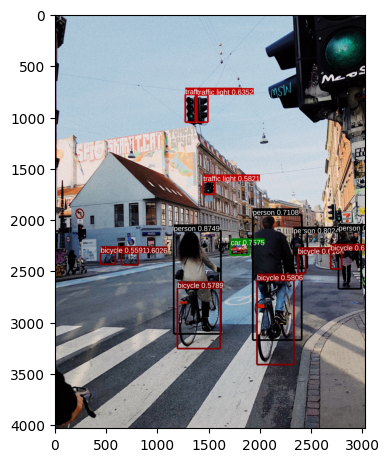

In [ ]:
model_dir = "inference_model/dino_r50_4scale_1x_coco"
image_file="detection_pose/object-detection_input_image.jpg"
device = "GPU"
deploy_file = os.path.join(model_dir, "infer_cfg.yml")
with open(deploy_file) as f:
    yml_conf = yaml.safe_load(f)
arch = yml_conf["arch"]

paddle.enable_static()
detector = Detector(model_dir=model_dir, device=device)
image_array = cv2.imread(image_file)[..., ::-1]
results = detector.predict_image([image_array], visual=False)
detector.det_times.info(average=True)

im = draw_box(
    image_array, results, PredictConfig(model_dir).labels, threshold=0.5
)
im = np.array(im)
plt.figure(figsize=(4,6))
plt.imshow(im)
plt.show()


Since the video inference for object detection and pose estimation is similar lets use one function to do both.

In [ ]:
def video_inference(video_file, detector, keypoint_or_object, output_name):
  capture = cv2.VideoCapture(video_file)
  width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps = int(capture.get(cv2.CAP_PROP_FPS))
  out_path = output_name
  fourcc = cv2.VideoWriter_fourcc(*"mp4v")
  writer = cv2.VideoWriter(out_path, fourcc, fps, (width, height))
  index = 1
  while 1:
      ret, frame = capture.read()
      if not ret:
          break
      print("detect frame: %d" % (index))
      index += 1
      results = detector.predict_image([frame[..., ::-1]], visual=False)
      if keypoint_or_object=="object":
        im = visualize_box_mask(
            frame, results, PredictConfig(model_dir).labels, threshold=0.5
        )
      else:
        im_results = {}
        im_results["keypoint"] = [results["keypoint"], results["score"]]
        im = visualize_pose(frame, im_results, visual_thresh=0.3, returnimg=True)

      im = np.array(im)
      writer.write(im)

  writer.release()


In [ ]:
video_inference("detection_pose/object-detection_input_video.mp4", detector, "object", "objects_in_vide.mp4")

Streaming output truncated to the last 5000 lines.
class_id:0, confidence:0.9204, left_top:[462.07,695.03],right_bottom:[781.49,1171.69]
class_id:0, confidence:0.8512, left_top:[250.59,781.80],right_bottom:[379.81,1111.83]
class_id:0, confidence:0.8506, left_top:[-18.39,812.80],right_bottom:[215.45,1115.74]
class_id:36, confidence:0.7318, left_top:[664.64,1151.01],right_bottom:[725.82,1192.13]
detect frame: 214
Test iter 0
-----------  Model Configuration -----------
Model Arch: DETR
Transform Order: 
--transform op: Resize
--transform op: NormalizeImage
--transform op: Permute
--------------------------------------------
class_id:0, confidence:0.9114, left_top:[453.90,691.66],right_bottom:[793.78,1187.04]
class_id:0, confidence:0.8761, left_top:[237.85,781.64],right_bottom:[379.33,1111.25]
class_id:0, confidence:0.8465, left_top:[-17.62,815.05],right_bottom:[193.99,1116.78]
class_id:0, confidence:0.5466, left_top:[715.11,853.60],right_bottom:[788.70,1069.12]
detect frame: 215
Test ite

## Pose Estimation

Exporting HigherHRNet for keypoint detection

In [ ]:
!python tools/export_model.py -c configs/keypoint/higherhrnet/higherhrnet_hrnet_w32_512.yml --output_dir=outut_inference -o weights=detection_pose/higherhrnet_hrnet_w32_512.pdparams

/usr/local/lib/python3.10/dist-packages/setuptools/sandbox.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/u

The stickwidth variable used to determine the width of connecting elipses is hardcoded this makes it difficult to visualise for high-resolution images so we will be writing our own code for plotting, thus we will code adapted from the original repository for plotting.

In [ ]:

model_dir="outut_inference/higherhrnet_hrnet_w32_512"
image_file="detection_pose/pose-detection_input_image.jpg"
device="GPU"
threshold=0.3
deploy_file = os.path.join(model_dir, 'infer_cfg.yml')
with open(deploy_file) as f:
    yml_conf = yaml.safe_load(f)
arch = yml_conf['arch']

First based on the predictions we define a function for connecting the edges and define the edge colour as

In [ ]:
def get_variables(skeletons, scores):
    skeletons = np.array(skeletons)
    kpt_nums = 17
    if len(skeletons) > 0:
        kpt_nums = skeletons.shape[1]

    if kpt_nums == 17:
        EDGES = [
            (0, 1),
            (0, 2),
            (1, 3),
            (2, 4),
            (3, 5),
            (4, 6),
            (5, 7),
            (6, 8),
            (7, 9),
            (8, 10),
            (5, 11),
            (6, 12),
            (11, 13),
            (12, 14),
            (13, 15),
            (14, 16),
            (11, 12),
        ]
    else:  # plot mpii keypoint
        EDGES = [
            (0, 1),
            (1, 2),
            (3, 4),
            (4, 5),
            (2, 6),
            (3, 6),
            (6, 7),
            (7, 8),
            (8, 9),
            (10, 11),
            (11, 12),
            (13, 14),
            (14, 15),
            (8, 12),
            (8, 13),
        ]
    NUM_EDGES = len(EDGES)

    colors = [
        [255, 0, 0],
        [255, 85, 0],
        [255, 170, 0],
        [255, 255, 0],
        [170, 255, 0],
        [85, 255, 0],
        [0, 255, 0],
        [0, 255, 85],
        [0, 255, 170],
        [0, 255, 255],
        [0, 170, 255],
        [0, 85, 255],
        [0, 0, 255],
        [85, 0, 255],
        [170, 0, 255],
        [255, 0, 255],
        [255, 0, 170],
        [255, 0, 85],
    ]

    return EDGES, NUM_EDGES, colors, kpt_nums



Then we plot the keypoints using circles as

In [ ]:



def draw_circles(canvas, kpt_nums, skeletons, visual_thresh, colors, color_set, ids):
    for i in range(kpt_nums):
        for j in range(len(skeletons)):
            if skeletons[j][i, 2] < visual_thresh:
                continue
            if ids is None:
                color = (
                    colors[i]
                    if color_set is None
                    else colors[color_set[j] % len(colors)]
                )
            else:
                color = get_color(ids[j])

            cv2.circle(
                canvas,
                tuple(skeletons[j][i, 0:2].astype("int32")),
                2,
                color,
                thickness=-1,
            )




Followed by drawing the ellipse to connect these keypoints


In [ ]:

def draw_polygons(
    canvas,
    NUM_EDGES,
    skeletons,
    EDGES,
    visual_thresh,
    stickwidth,
    ids,
    colors,
    color_set,
):
    for i in range(NUM_EDGES):
        for j in range(len(skeletons)):
            edge = EDGES[i]
            if (
                skeletons[j][edge[0], 2] < visual_thresh
                or skeletons[j][edge[1], 2] < visual_thresh
            ):
                continue

            cur_canvas = canvas.copy()
            X = [skeletons[j][edge[0], 1], skeletons[j][edge[1], 1]]
            Y = [skeletons[j][edge[0], 0], skeletons[j][edge[1], 0]]
            mX = np.mean(X)
            mY = np.mean(Y)
            length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
            angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
            polygon = cv2.ellipse2Poly(
                (int(mY), int(mX)), (int(length / 2), stickwidth), int(angle), 0, 360, 1
            )
            if ids is None:
                color = (
                    colors[i]
                    if color_set is None
                    else colors[color_set[j] % len(colors)]
                )
            else:
                color = get_color(ids[j])
            cv2.fillConvexPoly(cur_canvas, polygon, color)
            canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    return canvas


The driver code used to call these functions is as follows


In [ ]:

def visualize_pose(
    imgfile,
    results,
    visual_thresh=0.6,
    save_name="pose.jpg",
    save_dir="output",
    returnimg=False,
    ids=None,
):
    skeletons, scores = results["keypoint"]
    EDGES, NUM_EDGES, colors, kpt_nums = get_variables(skeletons, scores)

    img = cv2.imread(imgfile) if type(imgfile) == str else imgfile

    color_set = results["colors"] if "colors" in results else None

    canvas = img.copy()
    draw_circles(canvas, kpt_nums, skeletons, visual_thresh, colors, color_set, ids)

    to_plot = cv2.addWeighted(img, 0.3, canvas, 0.7, 0)

    stickwidth = max(round(sum(img.shape[:2]) / 2 * 0.004), 2)

    canvas = draw_polygons(
        canvas,
        NUM_EDGES,
        skeletons,
        EDGES,
        visual_thresh,
        stickwidth,
        ids,
        colors,
        color_set,
    )
    return canvas

An example of results generated from code looks like this.


-----------  Model Configuration -----------
Model Arch: HigherHRNet
Transform Order: 
--transform op: EvalAffine
--transform op: NormalizeImage
--transform op: Permute
--------------------------------------------


/content/PaddleDetection/deploy/python/keypoint_postprocess.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pose_tags = np.array([cluster[k]['tags'] for k in cluster])


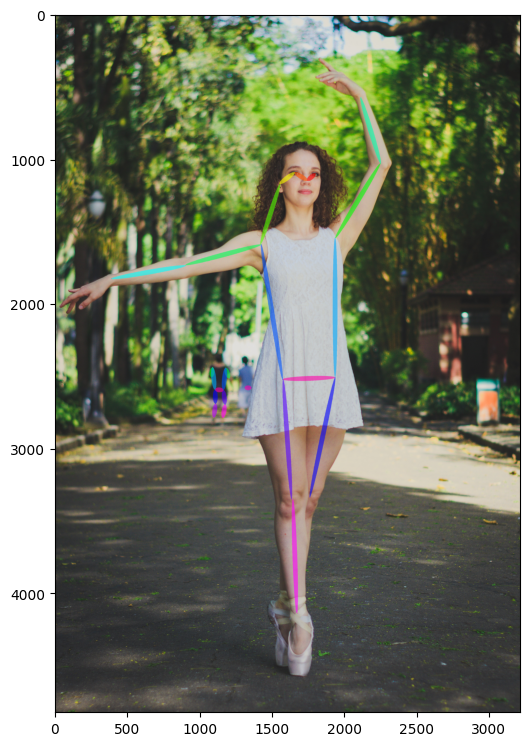

In [ ]:
paddle.enable_static()
detector = KeyPointDetector(model_dir=model_dir, device=device)
image_array = cv2.imread(image_file)[..., ::-1]
results = detector.predict_image([image_array], visual=False)
im_results = {}
im_results["keypoint"] = [results["keypoint"], results["score"]]
im = visualize_pose(image_array, im_results, visual_thresh=0.3, returnimg=True)
im = np.array(im)
plt.figure(figsize=(6, 15))
plt.imshow(im)
plt.show()

Now, lets get predictions on a video.

In [ ]:
detector = KeyPointDetector(model_dir=model_dir, device=device)
video_inference("detection_pose/pose_detection_input_video.mp4", detector, "pose", "pose_in_video.mp4")

-----------  Model Configuration -----------
Model Arch: HigherHRNet
Transform Order: 
--transform op: EvalAffine
--transform op: NormalizeImage
--transform op: Permute
--------------------------------------------
detect frame: 1
detect frame: 2
detect frame: 3
detect frame: 4
detect frame: 5
detect frame: 6
detect frame: 7
detect frame: 8
detect frame: 9
detect frame: 10
detect frame: 11
detect frame: 12
detect frame: 13
detect frame: 14
detect frame: 15
detect frame: 16
detect frame: 17
detect frame: 18
detect frame: 19
detect frame: 20
detect frame: 21
detect frame: 22
detect frame: 23
detect frame: 24
detect frame: 25
detect frame: 26
detect frame: 27
detect frame: 28
detect frame: 29
detect frame: 30
detect frame: 31
detect frame: 32
detect frame: 33
detect frame: 34
detect frame: 35
detect frame: 36
detect frame: 37
detect frame: 38
detect frame: 39
detect frame: 40
detect frame: 41
detect frame: 42
detect frame: 43
detect frame: 44
detect frame: 45
detect frame: 46
detect frame:

## Conclusion
In this notebook we used a pretrained PaddleDetection model for detecting objects and keypoints in image and video. By changing the config file and weights file while exporting we can easily use other models available on PaddleDetection.

## References
- https://github.com/PaddlePaddle/PaddleDetection